# Titanic Data Science Solutions


## Question and problem definition

Competition sites like Kaggle define the problem to solve or questions to ask while providing the datasets for training your data science model and testing the model results against a test dataset. The question or problem definition for Titanic Survival competition is [described here at Kaggle](https://www.kaggle.com/c/titanic).

> Knowing from a training set of samples listing passengers who survived or did not survive the Titanic disaster, can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not.

We may also want to develop some early understanding about the domain of our problem. This is described on the [Kaggle competition description page here](https://www.kaggle.com/c/titanic). Here are the highlights to note.

- On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
- One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
- Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.


In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.chdir('data')
%matplotlib inline

Import Data

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
# df = train_df.append(test_df, ignore_index=True)
# df.head()

Appending the data will not work because the test dataset has the target missing

In [3]:
print(train_df.Survived.value_counts(normalize=True))

0    0.616162
1    0.383838
Name: Survived, dtype: float64


In [4]:
print(train_df.columns.tolist())
print(test_df.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [5]:
train_df.dtypes
# Categorical: Survived, Sex, and Embarked. 
# Ordinal: Pclass.
# Continous: Age, Fare. 
# Discrete: SibSp, Parch.

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
train_df.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

In [7]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Which features contain blank, null or empty values?**


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
(train_df.isna().sum() *100) / train_df.shape[0]

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [12]:
(test_df.isna().sum() *100) / test_df.shape[0]

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

Cabin is heavily empty in both the training and test dataset and hence we can choose to drop this field
Age can be treated to fill in the missing values

In [13]:
train_df.describe(include=[np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Peter, Mrs. Catherine (Catherine Rizk)",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [14]:
train_df.describe(include=[np.number])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
train_df.Age.quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9, .99])

0.10    14.00
0.20    19.00
0.30    22.00
0.40    25.00
0.50    28.00
0.60    31.80
0.70    36.00
0.80    41.00
0.90    50.00
0.99    65.87
Name: Age, dtype: float64

In [16]:
train_df.Fare.quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9, .99])

0.10      7.55000
0.20      7.85420
0.30      8.05000
0.40     10.50000
0.50     14.45420
0.60     21.67920
0.70     27.00000
0.80     39.68750
0.90     77.95830
0.99    249.00622
Name: Fare, dtype: float64

**What is the distribution of numerical feature values across the samples?**

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

- Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
- Survived is a categorical feature with 0 or 1 values.
- Around 38% samples survived representative of the actual survival rate at 32%.
- Most passengers (> 75%) did not travel with parents or children.
- Nearly 30% of the passengers had siblings and/or spouse aboard.
- Fares varied significantly with few passengers (<1%) paying as high as $512.
- Few elderly passengers (<1%) within age range 65-80.

**What is the distribution of categorical features?**

- Names are unique across the dataset (count=unique=891)
- Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
- Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
- Embarked takes three possible values. S port used by most passengers (top=S)
- Ticket feature has high ratio (22%) of duplicate values (unique=681).

a=train_df.describe(include=['O']).T

In [17]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Peter, Mrs. Catherine (Catherine Rizk)",male,CA. 2343,G6,S
freq,1,577,7,4,644


a

# Total Dupicates
(a['count']-a['unique']) / a['count']

In [18]:
train_df['Name'].nunique()

891

In [19]:
train_df['PassengerId'].nunique()

891

In [20]:
train_df['Ticket'].nunique()

681

In [21]:
x=set(train_df.Ticket)
y=train_df.Ticket.shape[0]

(y-len(x))*100/y
# 23% of the tickets are duplicates

23.569023569023567

plt.figure(figsize=(10, 10))
sns.heatmap(train_df.corr())

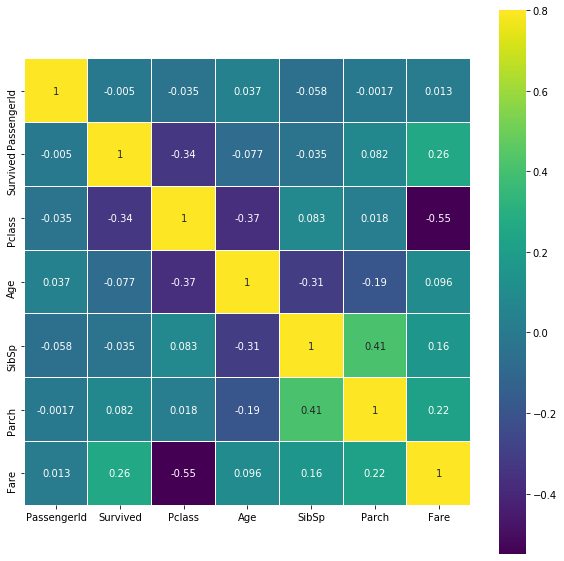

In [22]:
corr = train_df.corr()
plt.figure(figsize=(10, 10))
sns.color_palette("viridis")
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")

### Assumtions based on data analysis

We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

**Correlating.**

We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

**Completing.**

1. We may want to complete Age feature as it is definitely correlated to survival.
2. We may want to complete the Embarked feature as it may also correlate with survival or another important feature.

**Correcting.**

1. Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
2. Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
3. PassengerId may be dropped from training dataset as it does not contribute to survival.
4. Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.

**Creating.**

1. We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
2. We may want to engineer the Name feature to extract Title as a new feature.
3. We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
4. We may also want to create a Fare range feature if it helps our analysis.

**Classifying.**

We may also add to our assumptions based on the problem description noted earlier.

1. Women (Sex=female) were more likely to have survived.
2. Children (Age<?) were more likely to have survived. 
3. The upper-class passengers (Pclass=1) were more likely to have survived.

## Analyze by pivoting features

To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.

- **Pclass** We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.
- **Sex** We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).
- **SibSp and Parch** These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

In [23]:
train_df['Pclass']=train_df['Pclass'].astype('category')

In [24]:
train_df.groupby(['Sex','Survived'])['Survived'].mean().T

Sex     Survived
female  0           0
        1           1
male    0           0
        1           1
Name: Survived, dtype: int64

In [25]:
First_Class_Sample = np.array([np.mean(train_df[train_df["Pclass"]==1].sample(20)["Survived"].values) for i in range(100)])

In [26]:
train_df.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [27]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [28]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [29]:
train_df[['Pclass',"Sex", "Survived"]].groupby(['Pclass','Sex'], as_index=False).mean().sort_values(by=['Survived','Pclass','Sex'], ascending=False)

,Pclass,Sex,Survived
0,1,female,0.968085
2,2,female,0.921053
4,3,female,0.500000
1,1,male,0.368852
3,2,male,0.157407
5,3,male,0.135447


In [30]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [31]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Analyze by visualizing data

Now we can continue confirming some of our assumptions using visualizations for analyzing the data.

### Correlating numerical features

Let us start by understanding correlations between numerical features and our solution goal (Survived).

A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did infants have better survival rate?)

Note that x-axis in historgram visualizations represents the count of samples or passengers.

**Observations.**

- Infants (Age <=4) had high survival rate.
- Oldest passengers (Age = 80) survived.
- Large number of 15-25 year olds did not survive.
- Most passengers are in 15-35 age range.

**Decisions.**

This simple analysis confirms our assumptions as decisions for subsequent workflow stages.

- We should consider Age (our assumption classifying #2) in our model training.
- Complete the Age feature for null values (completing #1).
- We should band age groups (creating #3).

C:\Users\RAJU\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\RAJU\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


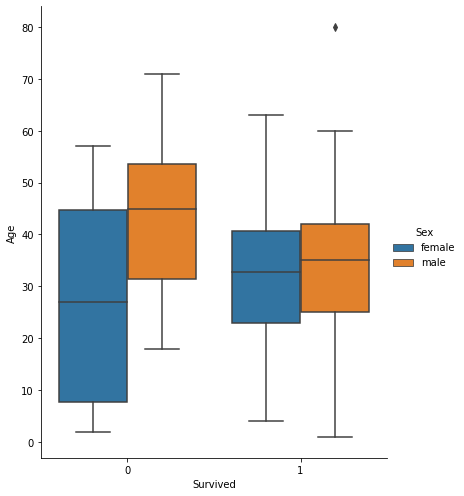

In [32]:
g = sns.factorplot(x="Survived", y="Age", hue='Sex', data=train_df.dropna(), kind="box", size=7, aspect=.8)

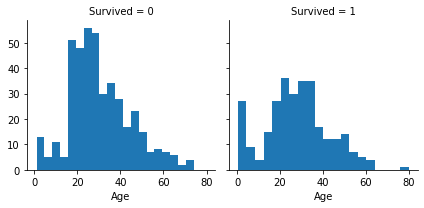

In [33]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

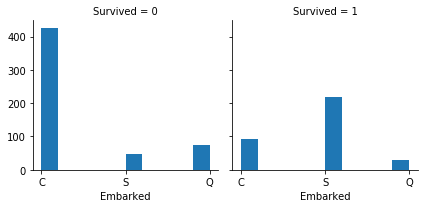

In [34]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Embarked', bins=10)

In [35]:
# import scipy.stats as stats
# stats.f_oneway(train_df['Survived'][train_df['Embarked']==0],
#                train_df['Survived'][train_df['Embarked']==1],
#               train_df['Survived'][train_df['Embarked']==2])

In [36]:
# stats.f_oneway(train_df['Survived'][train_df['IsAlone']==0],
#                train_df['Survived'][train_df['IsAlone']==1])

In [37]:
# stats.f_oneway(train_df['Survived'][train_df['Sex']==0],
#                train_df['Survived'][train_df['Sex']==1])

In [38]:
# stats.f_oneway(train_df['Survived'][train_df['Pclass']==0],
#                train_df['Survived'][train_df['Pclass']==1],
#               train_df['Survived'][train_df['Pclass']==2])

In [39]:
# train_df['Survived'][train_df['Sex']==0].shape

In [40]:
# from scipy.stats import chi2_contingency 
  
# # defining the table 
# data = [train_df['Survived'][train_df['Sex']==0],
#                train_df['Survived'][train_df['Sex']==1]] 
# stat, p, dof, expected = chi2_contingency(data) 
  
# # interpret p-value 
# alpha = 0.05
# print("p value is " + str(p)) 
# if p <= alpha: 
#     print('Dependent (reject H0)') 
# else: 
#     print('Independent (H0 holds true)') 

### Correlating numerical and ordinal features

We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

**Observations.**

- Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2.
- Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2.
- Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.
- Pclass varies in terms of Age distribution of passengers.

**Decisions.**

- Consider Pclass for model training.

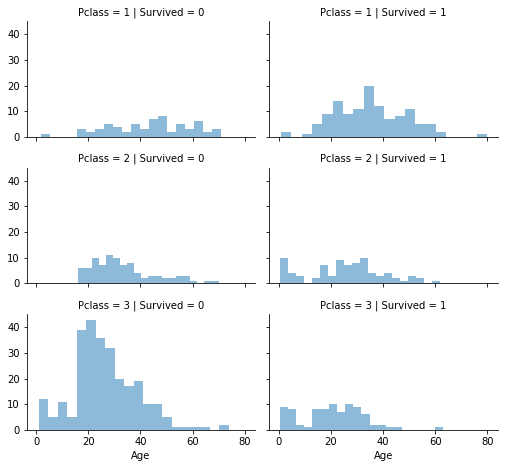

In [41]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### Correlating categorical features

Now we can correlate categorical features with our solution goal.

**Observations.**

- Female passengers had much better survival rate than males. Confirms classifying (#1).
- Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
- Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2).
- Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).

**Decisions.**

- Add Sex feature to model training.
- Complete and add Embarked feature to model training.

C:\Users\RAJU\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\RAJU\anaconda3\lib\site-packages\seaborn\axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


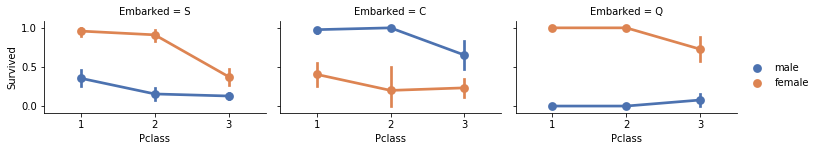

In [42]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, col='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

### Correlating categorical and numerical features

We may also want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric).

**Observations.**

- Higher fare paying passengers had better survival. Confirms our assumption for creating (#4) fare ranges.
- Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2).

**Decisions.**

- Consider banding Fare feature.

C:\Users\RAJU\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


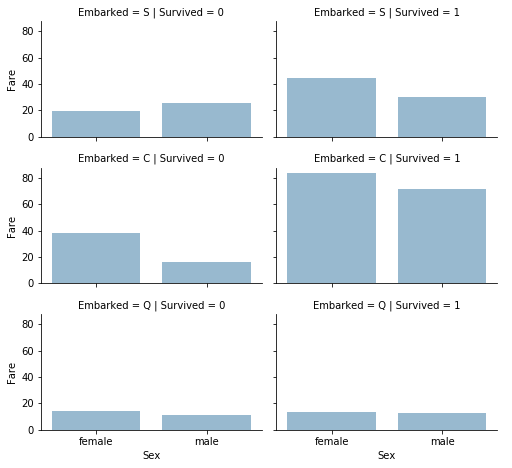

In [43]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## Wrangle data

We have collected several assumptions and decisions regarding our datasets and solution requirements. So far we did not have to change a single feature or value to arrive at these. Let us now execute our decisions and assumptions for correcting, creating, and completing goals.

### Correcting by dropping features

This is a good starting goal to execute. By dropping features we are dealing with fewer data points. Speeds up our notebook and eases the analysis.

Based on our assumptions and decisions we want to drop the Cabin (correcting #2) and Ticket (correcting #1) features.

Note that where applicable we perform operations on both training and testing datasets together to stay consistent.

In [44]:
combine = [train_df, test_df]

In [45]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

Now we can safely drop the Name feature from training and testing datasets. We also do not need the PassengerId feature in the training dataset.

In [46]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name','PassengerId'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 8), (418, 7))

### Converting a categorical feature

Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.

Let us start by converting Sex feature to a new feature called Gender where female=1 and male=0.

In [47]:
train_df['Sex'] = train_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test_df['Sex'] = test_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [48]:
print(train_df.head())
print(test_df.head())

   Survived Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0         0      3    0  22.0      1      0   7.2500        S
1         1      1    1  38.0      1      0  71.2833        C
2         1      3    1  26.0      0      0   7.9250        S
3         1      1    1  35.0      1      0  53.1000        S
4         0      3    0  35.0      0      0   8.0500        S
   Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0       3    0  34.5      0      0   7.8292        Q
1       3    1  47.0      1      0   7.0000        S
2       2    0  62.0      0      0   9.6875        Q
3       3    0  27.0      0      0   8.6625        S
4       3    1  22.0      1      1  12.2875        S


for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

In [49]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

Let us create Age bands and determine correlations with Survived.

In [50]:
for dataset in combine:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

In [51]:
train_df['Band'] = pd.cut(train_df['Age'], 5)
train_df[['Band', 'Survived']].groupby(['Band'], as_index=False).mean().sort_values(by='Band', ascending=True)

,Band,Survived
0,"(-0.08, 16.0]",0.543860
1,"(16.0, 32.0]",0.349099
2,"(32.0, 48.0]",0.371542
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_df['test'] = le.fit_transform(train_df.Band)
print(train_df['test'].sample(5))
print(train_df.test.unique())

Let us replace Age with ordinals based on these bands.

In [52]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Band
0,0,3,0,1,1,0,7.2500,S,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,"(32.0, 48.0]"


In [53]:
for dataset in combine:
    dataset['Age'] = dataset['Age'].astype('category')

In [54]:
train_df['Age'].value_counts()

1    444
2    253
0    114
3     69
4     11
Name: Age, dtype: int64

We can not remove the AgeBand feature.

In [55]:
sample=train_df['Age'].sample(100,random_state=100)

sample.value_counts()

1    52
2    30
0    11
3     6
4     1
Name: Age, dtype: int64

In [56]:
train_df = train_df.drop(['Band'], axis=1)
# combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1,1,0,7.2500,S
1,1,1,1,2,1,0,71.2833,C
2,1,3,1,1,0,0,7.9250,S
3,1,1,1,2,1,0,53.1000,S
4,0,3,0,2,0,0,8.0500,S


### Create new feature combining existing features

We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [57]:
combine = [train_df, test_df]
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

train_df['IsAlone'] = 0
test_df['IsAlone'] = 0
train_df.loc[train_df['FamilySize'] == 1, 'IsAlone'] = 1
test_df.loc[test_df['FamilySize'] == 1, 'IsAlone'] = 1

In [58]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.

In [59]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,0,1,7.2500,S,0
1,1,1,1,2,71.2833,C,0
2,1,3,1,1,7.9250,S,1
3,1,1,1,2,53.1000,S,0
4,0,3,0,2,8.0500,S,1


We can also create an artificial feature combining Pclass and Age.

In [60]:
# for dataset in combine:
#     dataset['Age*Class'] = dataset.Age * dataset.Pclass

# train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

### Completing a categorical feature

Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [61]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [62]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Converting categorical feature to numeric

We can now convert the EmbarkedFill feature by creating a new numeric Port feature.

In [63]:
train_df['Embarked'] = train_df['Embarked'].map({"S": 0, "C": 1, "Q": 2}).astype('category')
test_df['Embarked'] = test_df['Embarked'].map({"S": 0, "C": 1, "Q": 2}).astype('category')

In [64]:
train_df.head()
test_df.head()

,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,3,0,1,7.8292,2,1
1,3,1,2,7.0000,0,0
2,2,0,1,9.6875,2,1
3,3,0,2,8.6625,0,1
4,3,1,2,12.2875,0,0


for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({"S": 0, "C": 1, "Q": 2}).astype('category')

train_df.head()

### Quick completing and converting a numeric feature

We can now complete the Fare feature for single missing value in test dataset using mode to get the value that occurs most frequently for this feature. We do this in a single line of code.

Note that we are not creating an intermediate new feature or doing any further analysis for correlation to guess missing feature as we are replacing only a single value. The completion goal achieves desired requirement for model algorithm to operate on non-null values.

We may also want round off the fare to two decimals as it represents currency.

In [65]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,3,0,1,7.8292,2,1
1,3,1,2,7.0000,0,0
2,2,0,1,9.6875,2,1
3,3,0,2,8.6625,0,1
4,3,1,2,12.2875,0,0


We can not create FareBand.

In [66]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Convert the Fare feature to ordinal values based on the FareBand.

In [67]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,0,1,0,0,0
1,1,1,1,2,3,1,0
2,1,3,1,1,1,0,1
3,1,1,1,2,3,0,0
4,0,3,0,2,1,0,1
5,0,3,0,1,1,2,1
6,0,1,0,3,3,0,1
7,0,3,0,0,2,0,0
8,1,3,1,1,1,0,0
9,1,2,1,0,2,1,0


In [68]:
for dataset in combine:
    dataset['Fare'] = dataset['Fare'].astype('category')

And the test dataset.

In [69]:
test_df.head(10)

,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,3,0,1,0,2,1
1,3,1,2,0,0,0
2,2,0,1,1,2,1
3,3,0,2,1,0,1
4,3,1,2,1,0,0
5,3,0,1,1,0,1
6,3,1,3,0,2,1
7,2,0,0,2,0,0
8,3,1,1,0,1,1
9,3,0,0,2,0,0


# Graphical EDA

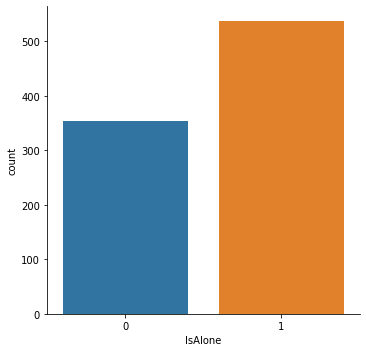

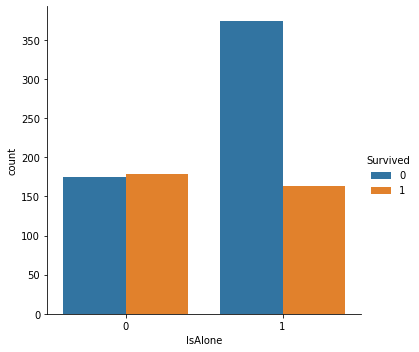

In [70]:
# g= sns.catplot('IsAlone', col='Survived', data=train_df[train_df.Survived==1], kind='count')
g= sns.catplot('IsAlone',  data=train_df, kind='count')
g= sns.catplot('IsAlone', hue='Survived', data=train_df, kind='count')
# g.set(ylim=(0, 1))

### Hypothesis test between Survived and IsAlone

In [71]:
import scipy.stats as stats

In [72]:
First_Class_Sample = np.array([np.mean(train_df[train_df["Pclass"]==1].sample(100)["Survived"].values) for i in range(100)])
First_Class_Sample

array([0.7 , 0.65, 0.63, 0.7 , 0.71, 0.62, 0.67, 0.62, 0.66, 0.65, 0.59,
       0.62, 0.63, 0.65, 0.65, 0.69, 0.57, 0.6 , 0.64, 0.66, 0.67, 0.64,
       0.59, 0.6 , 0.61, 0.65, 0.6 , 0.58, 0.61, 0.64, 0.6 , 0.6 , 0.6 ,
       0.66, 0.63, 0.62, 0.66, 0.65, 0.63, 0.65, 0.65, 0.56, 0.61, 0.63,
       0.67, 0.65, 0.62, 0.65, 0.58, 0.68, 0.69, 0.64, 0.59, 0.62, 0.7 ,
       0.6 , 0.6 , 0.58, 0.64, 0.66, 0.61, 0.56, 0.66, 0.65, 0.63, 0.59,
       0.67, 0.62, 0.65, 0.6 , 0.62, 0.63, 0.64, 0.63, 0.65, 0.66, 0.63,
       0.64, 0.62, 0.63, 0.64, 0.65, 0.67, 0.61, 0.66, 0.62, 0.66, 0.58,
       0.64, 0.57, 0.64, 0.63, 0.61, 0.68, 0.67, 0.62, 0.62, 0.67, 0.56,
       0.62])

In [73]:
train_df.groupby(['Survived']).sum()

,Sex,IsAlone
Survived,,
0,81,374
1,233,163


In [74]:
def chi2_result(crosstab_table, alpha=0.05):
    observed_values = crosstab_table.values
    print("Observed Values : \n",observed_values)
    
    val=stats.chi2_contingency(sample_table)
    
    expected_values = val[3]
    
    no_of_rows=len(sample_table.iloc[0:2,0])
    no_of_columns=len(sample_table.iloc[0,0:2])
    ddof=(no_of_rows-1)*(no_of_columns-1)
    print("Degree of Freedom: ",ddof)
    alpha = alpha
    
    from scipy.stats import chi2
    chi_square=sum([(o-e)**2./e for o,e in zip(observed_values,expected_values)])
    chi_square_statistic=chi_square[0]+chi_square[1]
    print("chi-square statistic: ",chi_square_statistic)
    
    critical_value=chi2.ppf(q=1-alpha,df=ddof)
    print('critical_value: ',critical_value)
    
    #p-value
    p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
    print('p-value:',p_value)
    print('Significance level: ',alpha)
    print('Degree of Freedom: ',ddof)
    
    if chi_square_statistic >= critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

    if p_value <= alpha:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

In [75]:
sample_table = pd.crosstab(train_df['Survived'],train_df['IsAlone'])

In [76]:
print(sample_table)

IsAlone     0    1
Survived          
0         175  374
1         179  163


In [77]:
chi2_result(sample_table)

Observed Values : 
 [[175 374]
 [179 163]]
Degree of Freedom:  1
chi-square statistic:  36.85013084754587
critical_value:  3.841458820694124
p-value: 1.2756752321152476e-09
Significance level:  0.05
Degree of Freedom:  1
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


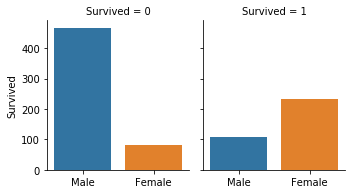

In [78]:
g = sns.catplot('Sex', col='Survived', data=train_df, kind='count', height=3, aspect=.8)
(g.set_axis_labels('', 'Survived')
     .set_xticklabels(["Male", "Female"])
     .set_titles("Survived = {col_name}")
     )

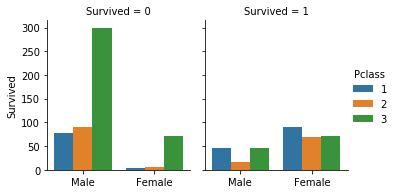

In [79]:
g = sns.catplot('Sex', col='Survived', hue='Pclass',data=train_df, kind='count', height=3, aspect=.8)
(g.set_axis_labels('', 'Survived')
     .set_xticklabels(["Male", "Female"])
     .set_titles("Survived = {col_name}")
     )

In [80]:
sample_table = pd.crosstab(train_df['Survived'],train_df['Sex'])
chi2_result(sample_table)

Observed Values : 
 [[468  81]
 [109 233]]
Degree of Freedom:  1
chi-square statistic:  263.05057407065567
critical_value:  3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


Observation: Females have survived much more than males

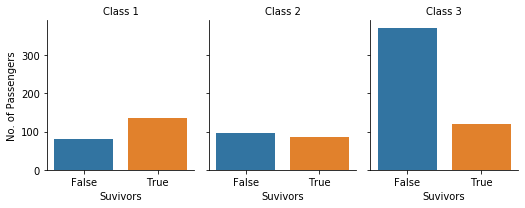

In [82]:
g = sns.catplot('Survived', col='Pclass', data=train_df, kind='count', height=3, aspect=.8)

# Fix up the labels
(g.set_axis_labels('Suvivors', 'No. of Passengers')
    .set_xticklabels(["False", "True"])
    .set_titles('Class {col_name}'))


In [83]:
sample_table = pd.crosstab(train_df['Survived'],train_df['Pclass'])
chi2_result(sample_table)

Observed Values : 
 [[ 80  97 372]
 [136  87 119]]
Degree of Freedom:  1
chi-square statistic:  61.335917863975695
critical_value:  3.841458820694124
p-value: 4.773959005888173e-15
Significance level:  0.05
Degree of Freedom:  1
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


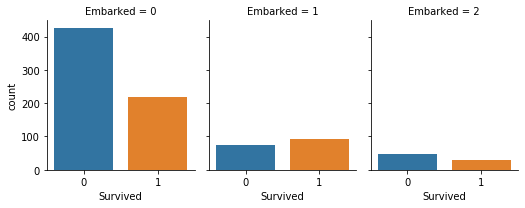

In [84]:
sns.catplot('Survived', col='Embarked',data=train_df, kind='count',height=3, aspect=.8)
(g.set_axis_labels('Suvivors', 'No. of Passengers')
    .set_xticklabels(["False", "True"])
    .set_titles('Class {col_name}'))

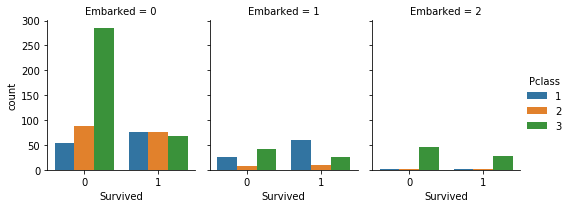

In [85]:
sns.catplot('Survived', col='Embarked',data=train_df, hue='Pclass', kind='count',height=3, aspect=.8)
(g.set_axis_labels('Suvivors', 'No. of Passengers')
    .set_xticklabels(["False", "True"])
    .set_titles('Class {col_name}'))

In [86]:
sample_table = pd.crosstab(train_df['Survived'],train_df['Embarked'])
chi2_result(sample_table)

Observed Values : 
 [[427  75  47]
 [219  93  30]]
Degree of Freedom:  1
chi-square statistic:  25.95360609277088
critical_value:  3.841458820694124
p-value: 3.4972155360524226e-07
Significance level:  0.05
Degree of Freedom:  1
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


C:\Users\RAJU\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\RAJU\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


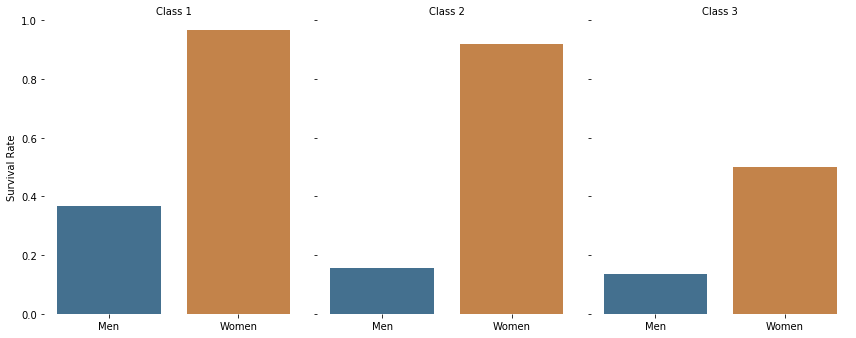

In [87]:
# Graph - Grouped by class, survival and sex
g = sns.factorplot(x="Sex", y="Survived", col="Pclass", data=train_df,
                   saturation=.5, kind="bar", ci=None, size=5, aspect=.8)

# Fix up the labels
(g.set_axis_labels('', 'Survival Rate')
     .set_xticklabels(["Men", "Women"])
     .set_titles("Class {col_name}")
     .set(ylim=(0, 1))
     .despine(left=True, bottom=True))

## Model, predict and solve

Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

In [88]:
train_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
IsAlone     0
dtype: int64

In [89]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 6), (891,), (418, 6))

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. Reference [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression).

Note the confidence score generated by the model based on our training dataset.

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

In [95]:
#Standard Logistic Regression
lr = LogisticRegression(solver='liblinear').fit(X_train, Y_train)

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, Y_train)

# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, Y_train)

In [96]:
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1,l2
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [ ]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()

In [97]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.57

We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

- Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.
- Inversely as Pclass increases, probability of Survived=1 decreases the most.
- This way Age*Class is a good artificial feature to model as it has second highest negative correlation with Survived.
- So is Title as second highest positive correlation.

In [98]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.489186
4,Embarked,0.313107
3,Fare,-0.024343
5,IsAlone,-0.047942
2,Age,-0.488316
0,Pclass,-1.160766


Next we model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of **two categories**, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. Reference [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine).

Note that the model generates a confidence score which is higher than Logistics Regression model.

#KNN
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

comb = [X_train, Y_train]
cols = Y_train.columns
for df in comb:
    for col in cols:
        df[col] = mm.fit_transform(df[col])

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

# Estimate KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [99]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

82.04

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. Reference [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

KNN confidence score is better than Logistics Regression but worse than SVM.

In [100]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.4

In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. Reference [Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier).

The model generated confidence score is the lowest among the models evaluated so far.

# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time. Reference [Wikipedia](https://en.wikipedia.org/wiki/Perceptron).

# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

In [101]:
# Linear SVC
from sklearn.svm import  LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

79.12

# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning).

The model confidence score is the highest among models evaluated so far.

In [102]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.63

The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Random_forest).

The model confidence score is the highest among models evaluated so far. We decide to use this model's output (Y_pred) for creating our competition submission of results.

In [103]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.63

### Model evaluation

We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set. 

In [104]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,85.63
5,Decision Tree,85.63
1,KNN,84.40
0,Support Vector Machines,82.04
2,Logistic Regression,79.57
4,Linear SVC,79.12


### Hypothesis Testing from Medium

In [ ]:
# Distribution for rich:
# first_fares = Data["Fare"][Data["Pclass"]==1]
# first_mean = round(np.mean(first_fares), 2)
# first_median = round(np.median(first_fares), 2)
# first_conf = np.round(np.percentile(first_fares, [2.5, 97.5]), 2)
# fig, ax = plt.subplots(figsize = (10, 7))
# ax.hist(first_fares)
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# ax.text(0.76, 0.95, f"Mean: {first_mean} \nMedian: {first_median} \nCI: {first_conf}", transform=ax.transAxes, fontsize=14,
#         verticalalignment='top', bbox=props)
# plt.xlabel("Fare")
# plt.ylabel("Frequency")
# plt.title("Distribution of the fare of the tickets in the first class")
# plt.show()
# # Distribution for Poor
# third_fares = Data["Fare"][Data["Pclass"]==3]
# third_mean = round(np.mean(third_fares), 2)
# third_median = round(np.median(third_fares), 2)
# third_conf = np.round(np.percentile(third_fares, [2.5, 97.5]), 2)
# fig, ax = plt.subplots(figsize = (10, 7))
# ax.hist(third_fares)
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# ax.text(0.76, 0.95, f"Mean: {third_mean} \nMedian: {third_median} \nCI: {third_conf}", transform=ax.transAxes, fontsize=14,
#         verticalalignment='top', bbox=props)
# plt.xlabel("Fare")
# plt.ylabel("Frequency")
# plt.title("Distribution of the fare of the tickets in the third class")
# plt.show()

In [ ]:
# x = ["First-Class", "Third-Class"]
# y = [np.mean(Data["Survived"][Data["Pclass"]==1]), np.mean(Data["Survived"][Data["Pclass"]==3])]
# plt.bar(x, y)
# plt.ylabel("Survival Rate")
# plt.title("Survival Rate for people in the first and third classes")
# plt.show()

In [ ]:
# First_Class_Sample = np.array([np.mean(Data[Data["Pclass"]==1].sample(20)["Survived"].values) for i in range(100)])
# third_Class_Sample = np.array([np.mean(Data[Data["Pclass"]==3].sample(20)["Survived"].values) for i in range(100)])

In [ ]:
# plt.subplots(1, 2, figsize = (10, 5))
# plt.subplot(1,2, 1)
# sn.distplot(First_Class_Sample)
# plt.title("First-Class Sample Distribution")
# plt.xlabel("Survival Rate")
# plt.ylabel("Frequency")
# plt.subplot(1, 2, 2)
# sn.distplot(third_Class_Sample)
# plt.title("Third-Class Sample Distribution")
# plt.xlabel("Survival Rate")
# plt.ylabel("Frequency")
# plt.show()

In [ ]:
# effect = np.mean(First_Class_Sample) - np.mean(third_Class_Sample)
# sigma_first = np.std(First_Class_Sample)
# sigma_third = np.std(third_Class_Sample)
# sigma_difference = np.sqrt((sigma_first**2)/len(First_Class_Sample)  +  (sigma_third**2)/len(third_Class_Sample))
# z_score = effect / sigma_difference

In [ ]:
# st.norm.sf(abs(z_score))*2